In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import dirname
import csv

In [2]:
datadir = os.getcwd()

suffix = ['1-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-135']

datafile_input = []
for i in range(0 , len(suffix)):
    temp = '/ids_{0}.csv'.format(suffix[i])

    with open(datadir+temp, 'r') as f:
        reader = csv.reader(f)
        input_1_20 = list(reader)
    datafile_input.append(input_1_20)
    
datafile_output = []
for i in range(0 , len(suffix)):
    temp = '/{0}.csv'.format(suffix[i])

    with open(datadir+temp, 'r') as f:
        reader = csv.reader(f)
        output_1_20 = list(reader)
    datafile_output.append(output_1_20)   

In [3]:
#extract gaia source IDs from the input files
input_ids = []

for j in range(0, len(datafile_input)):
    input_idss = []
    for i in range(0, len(datafile_input[j])):
        input_idss.append(int(datafile_input[j][i][0].split(" ")[2]))
    input_ids.append(input_idss)

In [4]:
#extract gaia source IDs from the output files

output_ids = []

for j in range(0, len(datafile_output)):
    temp = [int(datafile_output[j][i][0]) for i in range(1,len(datafile_output[j]))]
    output_ids.append(temp)

In [5]:
#check if every pair of files (resp. first input and first output file) contain same IDs

for i in range(0, len(output_ids)):
    print(set(output_ids[i]) == set(input_ids[i]))

True
True
True
True
True
True
True


In [6]:
#now extract all data into lists

output_info = datafile_output[0][0]

In [7]:
output_all = []
for j in range(0, len(datafile_output)):
    #print(j)
    for i in range(0, len(datafile_output[j])-1):
        #print(i)
        temp = datafile_output[j][1:][i]
        output_all.append(temp)

In [8]:
len(output_all)

135

In [9]:
output_info

['source_id',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'phot_g_mean_mag',
 'radial_velocity',
 'radial_velocity_error',
 'phot_variable_flag']

In [10]:
sid = np.array([int(output_all[i][0]) for i in range(0, len(output_all))])
ra = np.array([float(output_all[i][1]) for i in range(0, len(output_all))])
dec = np.array([float(output_all[i][3]) for i in range(0, len(output_all))])

magg = np.array([float(output_all[i][11]) for i in range(0, len(output_all))])
fluxg = 10**(-0.4*np.array(magg))

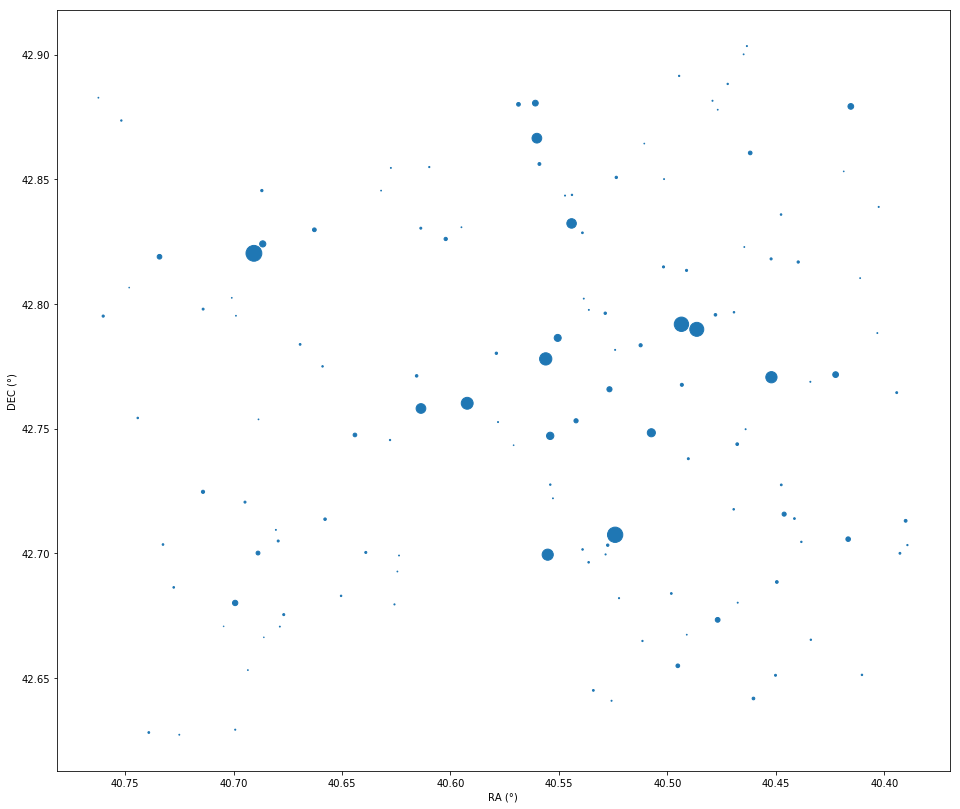

In [11]:
plt.subplots(1,1,figsize=(16,14))
plt.scatter(ra, dec, s=fluxg*5e5)

plt.gca().invert_xaxis()

plt.xlabel('RA (°)')
plt.ylabel('DEC (°)')

plt.show()

In [12]:
#because an (or some) elements in the following lists is not a number we cant convert it yet into floats... 
pax = np.asarray([output_all[i][5] for i in range(0, len(output_all))])
pmra = np.asarray([output_all[i][7] for i in range(0, len(output_all))])
pmdec = np.asarray([output_all[i][9] for i in range(0, len(output_all))])

In [13]:
pax

array(['1.6287698609118324', '1.9197179662586685', '0.06748575543337947',
       '0.063567935996442', '0.21262738738821776', '1.9241728596554344',
       '0.12676065081820995', '1.9354123349497458', '0.42580291980979273',
       '2.044822813443019', '1.8474051974283257', '0.4476914871729625',
       '1.9645703081633947', '0.8864090238434617', '1.9247322163187504',
       '1.8316025896996864', '1.869347883176732', '4.05347427483112',
       '1.9320062422036073', '1.9384072433612825', '2.065232055476835',
       '0.9529771049304052', '2.018797453476119', '1.6309687418784287',
       '1.9607019124010625', '1.9550591830852988', '0.5290756432404508',
       '1.9909942308725241', '0.19876120048106344', '1.822668727318403',
       '0.33427290510370955', '1.9237394999405244', '1.9940473887488166',
       '1.8719566902184155', '0.7630712946701596', '1.995245287858631',
       '2.0939829213874015', '2.131796813153491', '2.319287905566082',
       '2.2683620127239403', '1.9894846078677952', '1.12

In [14]:
'' in pax

True

In [15]:
for i in range(0, len(pax)):
    if pax[i] == '':
        print(i)    
    if pmra[i] == '':
        print(i)
    if pmdec[i] == '':
        print(i)
        
# star 133 resp. element 132 has no pax, pmra & pmdec!
# so the star will be removed from all lists

132
132
132


In [16]:
#remove element 132:

sid_new = np.delete(sid, 132)
ra_new = np.delete(ra, 132)
dec_new = np.delete(dec, 132)

magg_new = np.delete(magg, 132)
fluxg_new = np.delete(fluxg, 132)

pax_new = np.delete(pax, 132).astype(float)
pmra_new = np.delete(pmra, 132).astype(float)
pmdec_new = np.delete(pmdec, 132).astype(float)

In [17]:
pax_new

array([1.62876986, 1.91971797, 0.06748576, 0.06356794, 0.21262739,
       1.92417286, 0.12676065, 1.93541233, 0.42580292, 2.04482281,
       1.8474052 , 0.44769149, 1.96457031, 0.88640902, 1.92473222,
       1.83160259, 1.86934788, 4.05347427, 1.93200624, 1.93840724,
       2.06523206, 0.9529771 , 2.01879745, 1.63096874, 1.96070191,
       1.95505918, 0.52907564, 1.99099423, 0.1987612 , 1.82266873,
       0.33427291, 1.9237395 , 1.99404739, 1.87195669, 0.76307129,
       1.99524529, 2.09398292, 2.13179681, 2.31928791, 2.26836201,
       1.98948461, 1.127994  , 1.88484388, 0.01887781, 1.98263523,
       2.0191369 , 0.47353179, 1.90340321, 0.56544543, 2.04467631,
       1.74159857, 0.47482858, 1.9485694 , 0.58579297, 1.90138837,
       2.07606748, 1.82910862, 2.03329326, 0.80784135, 0.56873654,
       1.9951812 , 3.16846605, 1.61434318, 0.6519161 , 0.15834924,
       0.04121474, 0.267652  , 0.76448664, 2.09400936, 0.72853562,
       2.05153845, 1.95712511, 0.12634683, 2.03301364, 0.47648

In [18]:
def arrows(x, y, pm_x, pm_y, scale):
    temp = []
    for i in range(0, len(x)):
        temp2 = [x[i], y[i], scale * pm_x[i], scale * pm_y[i]]
        temp.append(temp2)
    return np.array(temp)

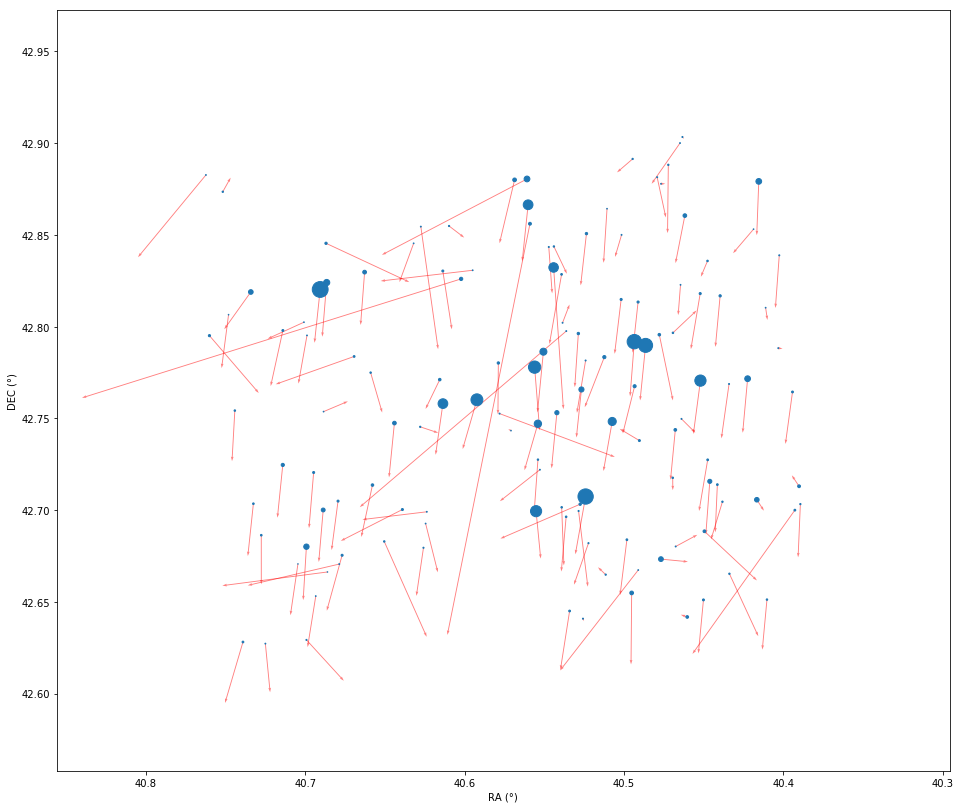

In [19]:
soa = arrows(ra_new, dec_new, pmra_new, pmdec_new, 0.005)


X, Y, U, V = zip(*soa)
plt.subplots(1,1,figsize=(16,14))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.001, alpha=0.5, color='r')
ax.scatter(ra_new, dec_new, s=np.array(fluxg_new)*5e5)

ax.invert_xaxis()

ax.margins(0.25) 

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')

plt.draw()
plt.show()

In [20]:
# convert parallaxes into parsecs
parcs = 1000./np.array(pax_new)

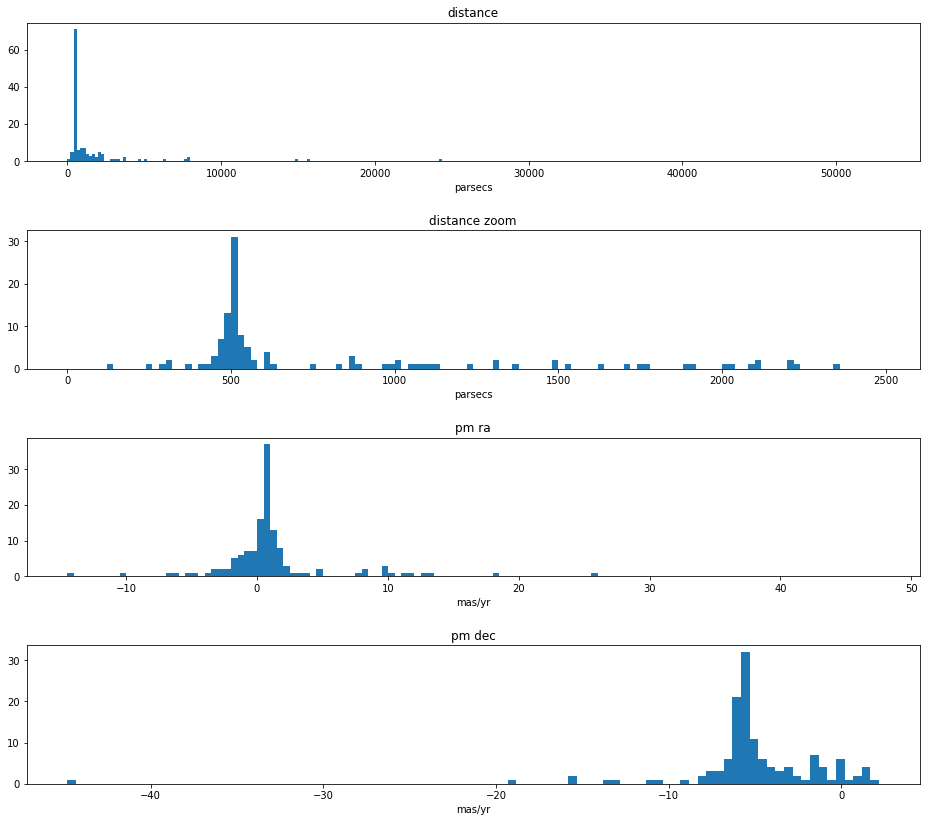

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16,14))
bottom = 0.1
ax1.hist(parcs, bins=np.arange(0,max(parcs)+10,200))
ax2.hist(parcs, bins=np.arange(0,2500,20))
ax3.hist(pmra_new, bins=np.arange(min(pmra_new),max(pmra_new),0.5))
ax4.hist(pmdec_new, bins=np.arange(min(pmdec_new),max(pmdec_new),0.5))

ax1.set_title('distance')
ax2.set_title('distance zoom')
ax3.set_title('pm ra')
ax4.set_title('pm dec')

ax1.set_xlabel('parsecs')
ax2.set_xlabel('parsecs')
ax3.set_xlabel('mas/yr')
ax4.set_xlabel('mas/yr')

plt.subplots_adjust(hspace=0.5)

plt.show()

In [22]:
mask_dist = []
mask_pmra = []
mask_pmde = []

for i in range(len(parcs)):
    #mask_dist.append(400 <= parcs[i] <= 600)
    mask_dist.append(0 <= parcs[i] <= 1000)
    
for j in range(len(pmra_new)):
    #mask_pmra.append(-5 <= pmra_new[j] <= 5)
    mask_pmra.append(-10 <= pmra_new[j] <= 10)
    
for k in range(len(pmdec_new)):
    #mask_pmde.append(-10 <= pmdec_new[k] <= 0)
    mask_pmde.append(-20 <= pmdec_new[k] <= 10)
    
mask_dist = np.array(mask_dist)
mask_pmra = np.array(mask_pmra)
mask_pmde = np.array(mask_pmde)

mask_cluster = []

for ind in range(max(len(mask_dist),len(mask_pmra),len(mask_pmde))):
    if mask_dist[ind] and mask_pmra[ind] and mask_pmde[ind]:
        mask_cluster.append(True) 
    else:
        mask_cluster.append(False)
        
mask_cluster = np.array(mask_cluster)

In [23]:
mask_cluster

array([ True,  True, False, False, False, False, False,  True, False,
        True,  True, False,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
        True, False,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False,  True,

In [24]:
ra_cl = ra_new[mask_cluster]
dec_cl =dec_new[mask_cluster]

pmra_new_cl = pmra_new[mask_cluster]
pmdec_new_cl = pmdec_new[mask_cluster]
parcs_cl = parcs[mask_cluster]

fluxg_cl = fluxg_new[mask_cluster]

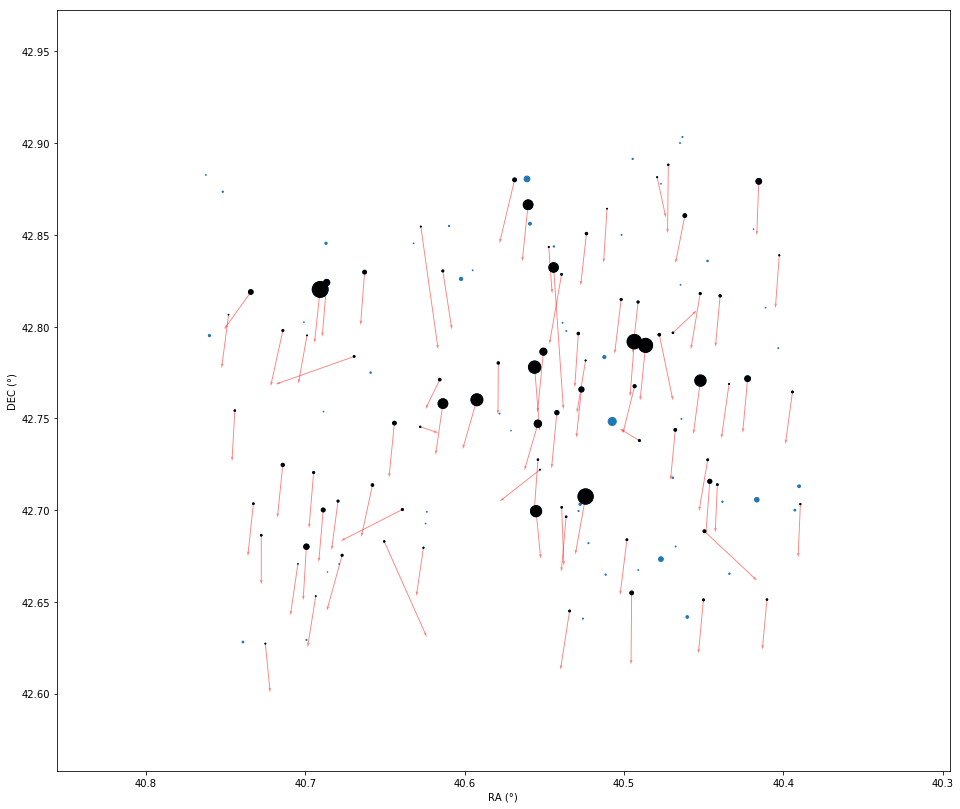

In [25]:
soa = arrows(ra_cl, dec_cl, pmra_new_cl, pmdec_new_cl, 0.005)

X, Y, U, V = zip(*soa)
plt.subplots(1,1,figsize=(16,14))
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, width=0.001, alpha=0.5, color='r')
ax.scatter(ra_new, dec_new, s=np.array(fluxg_new)*5e5)
ax.scatter(ra_cl, dec_cl, s=np.array(fluxg_cl)*5e5,c='k')

ax.invert_xaxis()

ax.margins(0.25) 

ax.set_xlabel('RA (°)')
ax.set_ylabel('DEC (°)')

plt.draw()
plt.show()

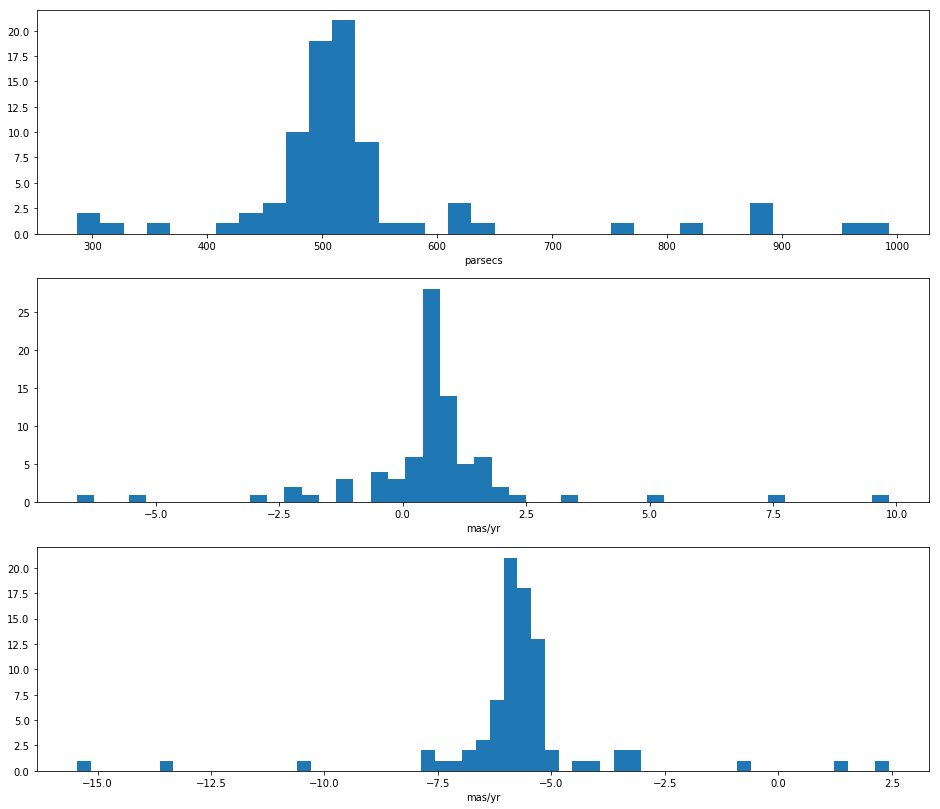

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,14))

_,bins, __ = ax1.hist(parcs_cl, bins='auto')#np.arange(400,600,20)
ax2.hist(pmra_new_cl, bins='auto') #np.arange(min(pmra_new_cl),max(pmra_new_cl),0.2)
ax3.hist(pmdec_new_cl, bins='auto') #np.arange(min(pmdec_new_cl),max(pmdec_new_cl),0.2)
ax1.set_xlabel('parsecs')
ax2.set_xlabel('mas/yr')
ax3.set_xlabel('mas/yr')
#plt.subplots_adjust(hspace=0.5)
plt.show()